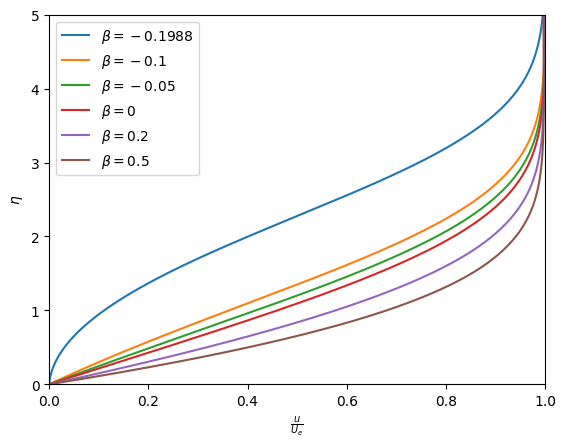

--- 1.8303072452545166 seconds ---


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

start_time = time.time()
beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
eta = np.linspace(0, 100, 5000)

f_double_prime_0 = [0.011999999999999122,
0.3189999999999994,
0.39999999999999947,
0.46899999999999953,
0.6859999999999997,
0.9269999999999999]

def falkner_skan_differential_equation(eta, f, beta):
    return [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]

for index, beta in enumerate(beta_list):
    f_init = [0, 0, f_double_prime_0]
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=[0,0, f_double_prime_0[index]], args=(beta,), t_eval=eta, method='RK45').y
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=[0,0, f_double_prime_0[index]], args=(beta,), t_eval=eta, method='RK45').y
    plt.plot(f_prime[:5001], eta[:5001], label=r"$\beta={}$".format(beta))
plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0,1), plt.ylim(0,5), plt.ylabel('$\eta$'), plt.legend(), plt.savefig('Project 2'), plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

In [55]:
from tabulate import tabulate
table_1 = []

theta_over_g_x = []
c_f_Re_theta = []
for beta in beta_list:
    f_init = [0, 0, 1]
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1] - 1) / abs(f_prime[-1] - 1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    theta_over_g_x.append(f_double_prime[0]/(1+beta) - beta/(1+beta)*(eta[-1] - f[-1]))
    c_f_Re_theta.append(2*f_double_prime[0]*theta_over_g_x[-1])
    table_1.append([beta, theta_over_g_x[-1], c_f_Re_theta[-1]])

with open('Table_1.tex', 'w') as f:
    f.write(tabulate(table_1, headers=[r'$\beta$', r'$\frac{\theta}{g(x)}$', r'$c_f Re_{\theta}$'], tablefmt='latex_raw'))

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

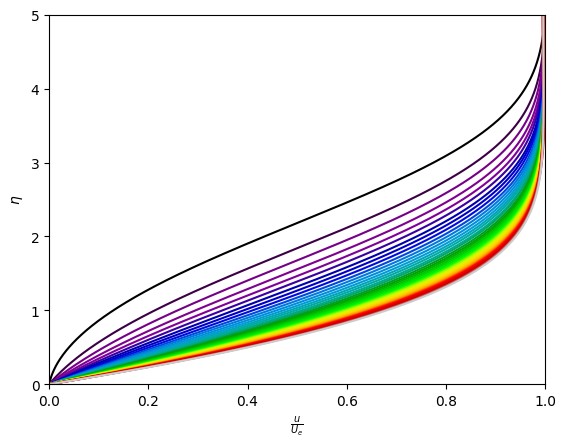

In [4]:
N = 40
min_beta = -0.2
max_beta = 0.5
beta_list = list(np.linspace(min_beta, max_beta, N))
cmap = plt.get_cmap('nipy_spectral', N)

for i, beta in enumerate(beta_list):
    f_init = [0, 0, 1]
    color = cmap(i / 5)
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1]-1)/abs(f_prime[-1]-1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 5), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    plt.plot(f_prime, eta[:5001], c=cmap(i))

plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0, 1), plt.ylim(0, 5), plt.ylabel('$\eta$')

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min_beta,vmax=max_beta)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=np.arange(min_beta, max_beta, 0.05))
cbar.ax.set_title(r"$\beta$"), plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
eta = np.linspace(0, 100, int(100/0.001))

def falkner_skan_differential_equation(eta, f, beta):
    return [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]

start_time = time.time()
for beta in beta_list:
    f_init = [0, 0, 1]
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1] - 1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    print(f_init[2], beta)
    plt.plot(f_prime[:5001], eta[:5001], label=r"$\beta={}$".format(beta))

print("--- %s seconds ---" % (time.time() - start_time))
plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0,1), plt.ylim(0,5), plt.ylabel('$\eta$'), plt.legend(), plt.savefig('Project 2'), plt.show()


KeyboardInterrupt



0.011999999999999122 -0.1988
0.3189999999999994 -0.1
0.39999999999999947 -0.05
0.46899999999999953 0
0.6859999999999997 0.2
0.9269999999999999 0.5
--- 301.66312074661255 seconds ---


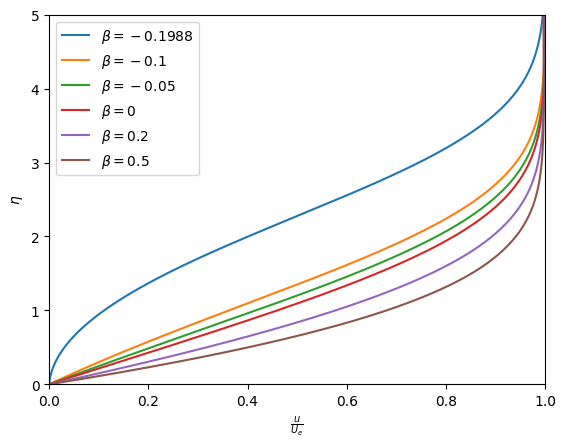

(Text(0.5, 33.42027777777778, '$\\frac{u}{U_e}$'),
 (0.0, 1.0),
 (0.0, 5.0),
 Text(25.000000000000007, 0.5, '$\\eta$'),
 None,
 None)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
eta = np.linspace(0, 100, 5000)

def falkner_skan_differential_equation(eta, f, beta):
    return [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]

start_time = time.time()
for beta in beta_list:
    f_init = [0, 0, 1]
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    while f_prime[-1] > 1:
        f_init[2] += -(f_prime[-1] - 1) / abs(f_prime[-1] - 1) * 0.001
        f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=f_init, args=(beta,), t_eval=eta, method='RK45').y
    print(f_init[2], beta)
    plt.plot(f_prime[:5001], eta[:5001], label=r"$\beta={}$".format(beta))
    
print("--- %s seconds ---" % (time.time() - start_time))
plt.xlabel(r"$\frac{u}{U_e}$"), plt.xlim(0,1), plt.ylim(0,5), plt.ylabel('$\eta$'), plt.legend(), plt.savefig('Project 2'), plt.show()

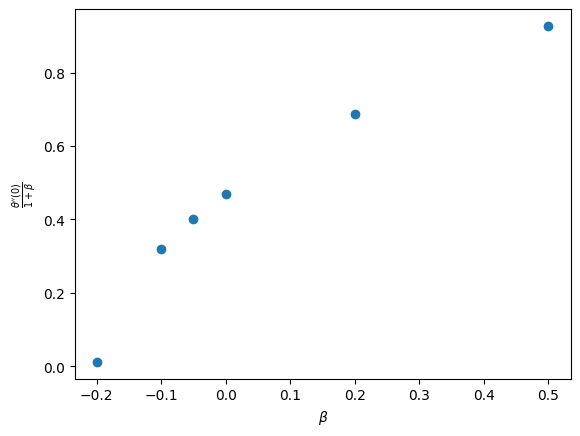

(Text(0.5, 28.0, '$\\beta$'),
 Text(37.50027777777778, 0.5, "$\\frac{\\theta''(0)}{1+\\beta}$"),
 None)

In [67]:
f_double_prime_0 = [0.011999999999999122,
0.3189999999999994,
0.39999999999999947,
0.46899999999999953,
0.6859999999999997,
0.9269999999999999]
beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
plt.scatter(beta_list, f_double_prime_0)
plt.xlabel(r"$\beta$"), plt.ylabel(r"$\frac{\theta''(0)}{1+\beta}$"), plt.show()

In [4]:
import numpy as np

def falkner_skan_differential_equation(eta, f, beta):
    return [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]

def rk4(fn, y0, n, dn, beta):
    k1 = fn(n, y0, beta)
    k2 = fn(n + 0.5 * dn, y0 + 0.5 * dn * k1, beta)
    k3 = fn(n + 0.5 * dn, y0 + 0.5 * dn * k2, beta)
    k4 = fn(n + dn, y0 + dn * k3, beta)
    y1 = y0 + (dn / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return y1

max_n = 100
dn = 0.001
all_y = []
y0 = [0, 0, 1]
beta_list = [-0.1988, -0.1, -0.05, 0, 0.2, 0.5]
eta = np.linspace(0, 100, 5000)

beta = 0.2
if __name__ == "__main__":
    for n in np.arange(0, max_n+dn, dn):
        y = rk4(falkner_skan_differential_equation, y0, n, dn, beta)
        all_y.append(y)
        y0 = y

TypeError: can't multiply sequence by non-int of type 'float'